In [1]:
import pandas as pd
from datetime import datetime
from zoe import cases, query, pickle, find_previous, plot_study, plot_study_evolution

In [2]:
uk_active_cases = query("SELECT * FROM uk_active_cases", index='date')
uk_active_cases.index = pd.to_datetime(uk_active_cases.index, format='%Y%m%d')
uk_active_cases

,cartodb_id,the_geom,the_geom_webmercator,corrected_covid_positive
date,,,,
2020-06-12,41680,None,None,85793.303129
2020-06-13,41681,None,None,79698.105027
2020-06-14,41682,None,None,74043.951935
2020-06-15,41683,None,None,68718.098364
2020-06-16,41684,None,None,63974.412424
...,...,...,...,...
2021-03-22,41963,None,None,74668.271070
2021-03-23,41964,None,None,73706.993179
2021-03-24,41965,None,None,72715.617613


In [3]:
curr_date = uk_active_cases.index.max()
print(pickle(uk_active_cases, 'uk_active_cases', curr_date))

/Users/chris/coronavirus/data/zoe_uk_active_cases_2021-03-26_2021-03-26-17-24.pickle


In [4]:
prev_date, prev_uk_active_cases = find_previous(curr_date)

/Users/chris/coronavirus/data/zoe_uk_active_cases_2021-03-25_2021-03-25-17-49.pickle


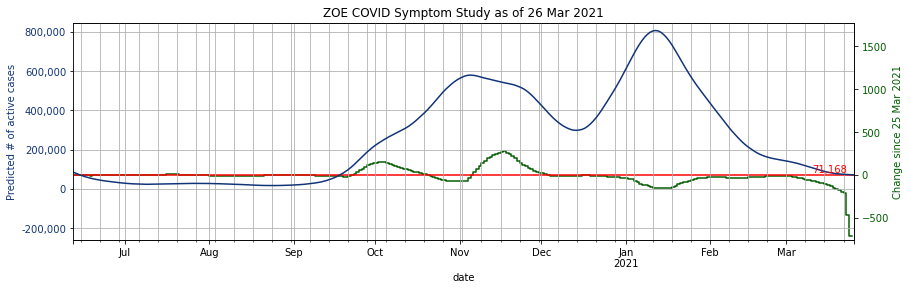

In [5]:
plot_study(curr_date, prev_date, uk_active_cases, prev_uk_active_cases)

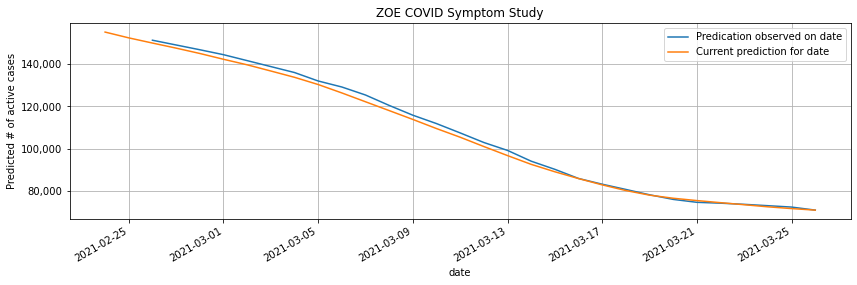

In [6]:
plot_study_evolution(curr_date, days=30)

In [7]:
prevalence_map = query("SELECT * FROM prevalence_map")
prevalence_map['percentage'] = prevalence_map['percentage'].astype(float)

In [8]:
for_date, = prevalence_map['data_status'].unique()
print(pickle(prevalence_map, 'prevalence_map', datetime.strptime(for_date, '%H:%M:%S %d-%m-%Y')))

/Users/chris/coronavirus/data/zoe_prevalence_map_2021-03-26_2021-03-26-17-24.pickle


In [9]:
prevalence_map[['lad16nm', 'lad16cd', 'percentage']].sort_values('percentage', ascending=False)[:10]

,lad16nm,lad16cd,percentage
324,East Dunbartonshire,S12000045,0.891834
55,Luton,E06000032,0.552262
243,North Warwickshire,E07000218,0.520354
241,Sheffield,E08000019,0.433992
297,Falkirk,S12000014,0.420078
205,Ashfield,E07000170,0.401231
320,West Lothian,S12000040,0.378704
107,Teignbridge,E07000045,0.368871
7,Halton,E06000006,0.361063
206,Broxtowe,E07000172,0.346936
